<a href="https://colab.research.google.com/github/tathithienthanh/DataAnalysis_Diagnosis-of-diabetes-based-on-data-set-of-blood-test-result/blob/main/PTDL_BTL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PTDL/Diabetes_Classification.csv')
df = df.drop(df.columns[0], axis = 1)

In [ ]:
df

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50.0,F,24.0,4.20,0.90,2.40,1.40,46.0,4.7,0.0
1,26.0,M,23.0,3.70,1.40,1.10,2.10,62.0,4.5,0.0
2,33.0,M,21.0,4.90,1.00,0.80,2.00,46.0,7.1,0.0
3,45.0,F,21.0,2.90,1.00,1.00,1.50,24.0,2.3,0.0
4,50.0,F,24.0,3.60,1.30,0.90,2.10,50.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5327,56.0,M,33.0,5.00,1.70,1.45,1.90,84.0,5.0,1.0
5328,61.0,F,39.0,3.80,3.00,0.90,1.70,111.0,10.5,1.0
5329,60.0,M,24.0,3.40,5.30,1.10,3.60,70.0,7.5,0.0
5330,52.0,F,24.0,5.07,1.08,1.37,3.31,57.3,4.5,0.0


# General observation about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5310 non-null   float64
 1   Gender     5332 non-null   object 
 2   BMI        5309 non-null   float64
 3   Chol       5306 non-null   float64
 4   TG         5300 non-null   float64
 5   HDL        5310 non-null   float64
 6   LDL        5314 non-null   float64
 7   Cr         5311 non-null   float64
 8   BUN        5311 non-null   float64
 9   Diagnosis  5313 non-null   float64
dtypes: float64(9), object(1)
memory usage: 416.7+ KB


In [ ]:
df.describe().round(3)

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5310.000,5309.000,5306.000,5300.000,5310.000,5314.000,5311.000,5311.000,5313.000
mean,48.638,24.130,4.690,1.504,1.346,2.705,70.626,4.596,0.203
std,15.253,7.719,3.448,3.984,4.349,3.911,29.764,4.919,3.367
min,-94.000,-99.000,-82.000,-94.000,-95.000,-98.000,-93.000,-98.000,-83.000
25%,36.000,22.000,4.180,0.900,1.090,2.270,57.750,3.900,0.000
50%,49.000,24.000,4.800,1.370,1.300,2.780,70.000,4.710,0.000
75%,59.000,27.000,5.460,2.100,1.590,3.390,81.400,5.600,1.000
max,93.000,47.000,11.650,32.640,9.900,9.900,800.000,38.900,1.000


In [ ]:
df['Age'].describe()

count    5310.000000
mean       48.637853
std        15.253447
min       -94.000000
25%        36.000000
50%        49.000000
75%        59.000000
max        93.000000
Name: Age, dtype: float64

In [ ]:
df['BMI'].describe()

count    5309.000000
mean       24.130345
std         7.718847
min       -99.000000
25%        22.000000
50%        24.000000
75%        27.000000
max        47.000000
Name: BMI, dtype: float64

In [ ]:
df['Chol'].describe()

count    5306.000000
mean        4.689629
std         3.448396
min       -82.000000
25%         4.180000
50%         4.800000
75%         5.460000
max        11.650000
Name: Chol, dtype: float64

In [ ]:
df['TG'].describe()

count    5300.000000
mean        1.503966
std         3.983595
min       -94.000000
25%         0.900000
50%         1.370000
75%         2.100000
max        32.640000
Name: TG, dtype: float64

In [ ]:
df['HDL'].describe()

count    5310.000000
mean        1.346343
std         4.349107
min       -95.000000
25%         1.090000
50%         1.300000
75%         1.590000
max         9.900000
Name: HDL, dtype: float64

In [ ]:
df['LDL'].describe()

count    5314.000000
mean        2.705066
std         3.910821
min       -98.000000
25%         2.270000
50%         2.780000
75%         3.390000
max         9.900000
Name: LDL, dtype: float64

In [ ]:
df['Cr'].describe()

count    5311.000000
mean       70.626207
std        29.763911
min       -93.000000
25%        57.750000
50%        70.000000
75%        81.400000
max       800.000000
Name: Cr, dtype: float64

In [ ]:
df['BUN'].describe()

count    5311.000000
mean        4.596416
std         4.919204
min       -98.000000
25%         3.900000
50%         4.710000
75%         5.600000
max        38.900000
Name: BUN, dtype: float64

In [ ]:
df['Diagnosis'].describe()

count    5313.000000
mean        0.203087
std         3.366983
min       -83.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Diagnosis, dtype: float64

Số dòng dữ liệu có giá trị NaN đối với từng thuộc tính

In [ ]:
print(df.isna().sum())

Age          22
Gender        0
BMI          23
Chol         26
TG           32
HDL          22
LDL          18
Cr           21
BUN          21
Diagnosis    19
dtype: int64


Số dòng dữ liệu trùng

In [ ]:
duplicated_rows = df[df.duplicated()]
print(len(duplicated_rows))

200


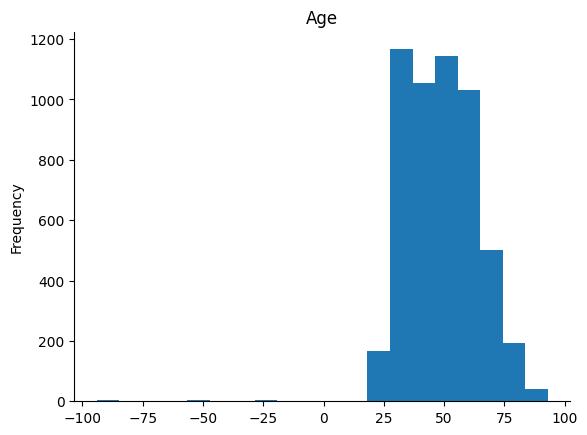

In [ ]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

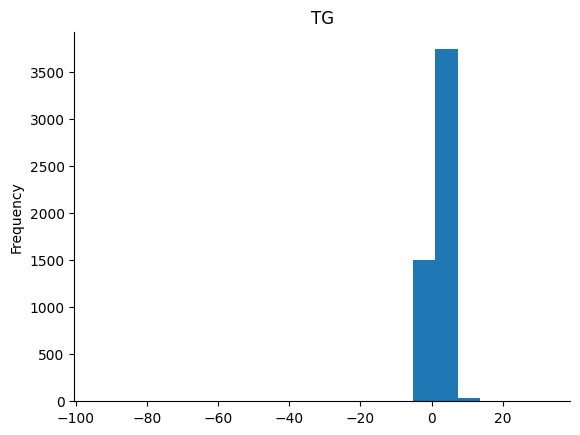

In [ ]:
from matplotlib import pyplot as plt
df['TG'].plot(kind='hist', bins=20, title='TG')
plt.gca().spines[['top', 'right',]].set_visible(False)

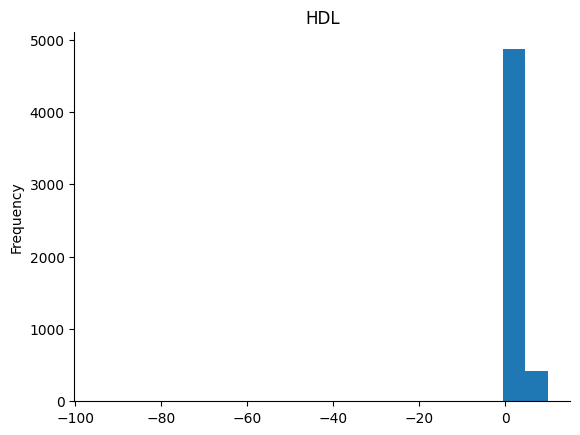

In [ ]:
from matplotlib import pyplot as plt
df['HDL'].plot(kind='hist', bins=20, title='HDL')
plt.gca().spines[['top', 'right',]].set_visible(False)

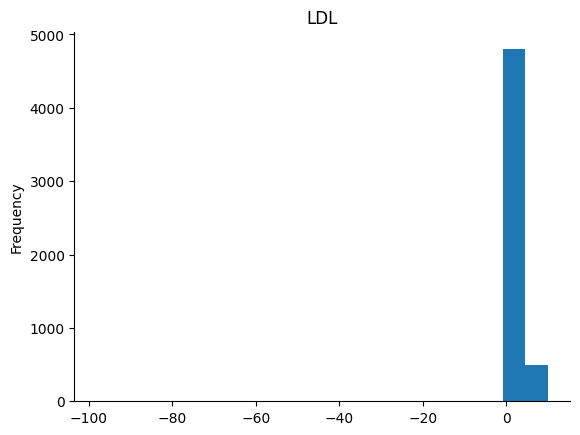

In [ ]:
from matplotlib import pyplot as plt
df['LDL'].plot(kind='hist', bins=20, title='LDL')
plt.gca().spines[['top', 'right',]].set_visible(False)

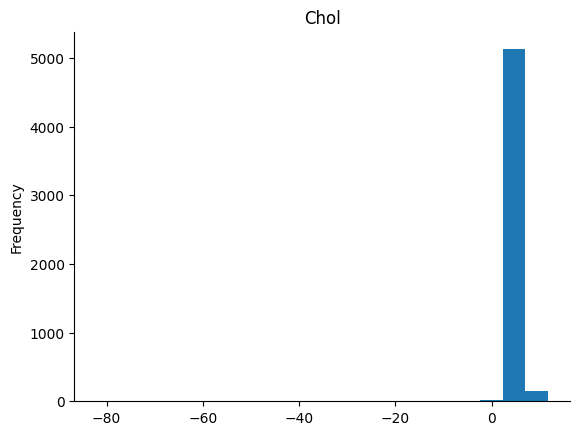

In [ ]:
from matplotlib import pyplot as plt
df['Chol'].plot(kind='hist', bins=20, title='Chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

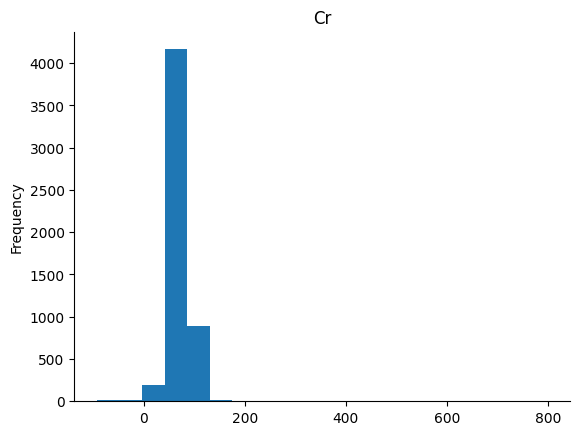

In [ ]:
from matplotlib import pyplot as plt
df['Cr'].plot(kind='hist', bins=20, title='Cr')
plt.gca().spines[['top', 'right',]].set_visible(False)

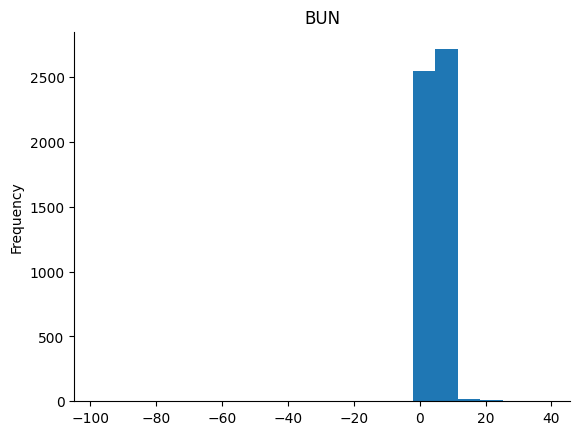

In [ ]:
from matplotlib import pyplot as plt
df['BUN'].plot(kind='hist', bins=20, title='BUN')
plt.gca().spines[['top', 'right',]].set_visible(False)

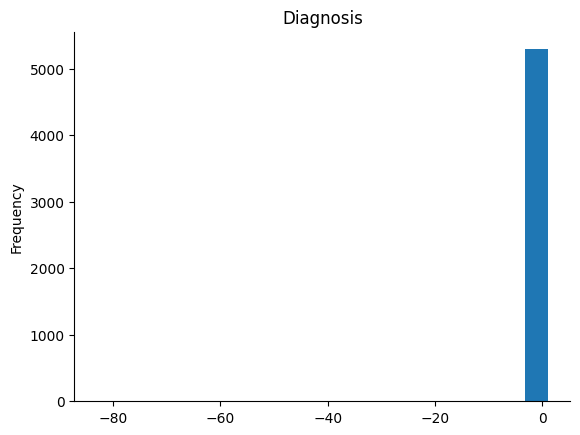

In [ ]:
from matplotlib import pyplot as plt
df['Diagnosis'].plot(kind='hist', bins=20, title='Diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

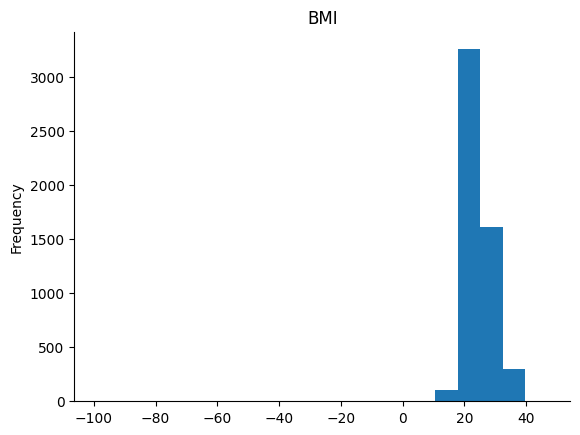

In [ ]:
from matplotlib import pyplot as plt
df['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

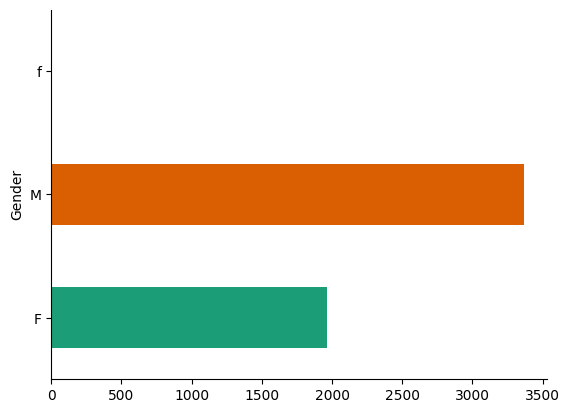

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['Gender'].value_counts()

Gender
M    3365
F    1966
f       1
Name: count, dtype: int64

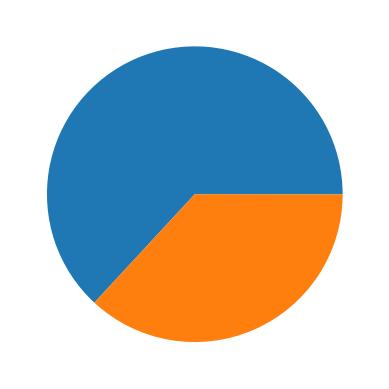

In [ ]:
plt.pie(df['Gender'].value_counts())
plt.show()

# Pre-processing data

Chuẩn hóa các gái trị của thuộc tính `Gender`

In [ ]:
df['Gender'] = df['Gender'].replace('f', 'F')

In [ ]:
df['Gender'].value_counts()

Gender
M    3365
F    1967
Name: count, dtype: int64

Xóa các dòng dữ liệu trùng lặp

In [ ]:
df =  df.drop_duplicates()
df = df.reset_index()
df = df.drop(df.columns[0], axis = 1)

In [ ]:
duplicated_rows = df[df.duplicated()]
print(len(duplicated_rows))

0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5131 entries, 0 to 5130
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5109 non-null   float64
 1   Gender     5131 non-null   object 
 2   BMI        5108 non-null   float64
 3   Chol       5106 non-null   float64
 4   TG         5100 non-null   float64
 5   HDL        5109 non-null   float64
 6   LDL        5113 non-null   float64
 7   Cr         5110 non-null   float64
 8   BUN        5111 non-null   float64
 9   Diagnosis  5113 non-null   float64
dtypes: float64(9), object(1)
memory usage: 401.0+ KB


Xóa các dòng dữ liệu chứa giá trị NaN

In [ ]:
df = df.dropna()
df = df.reset_index()
df = df.drop(df.columns[0], axis = 1)

In [ ]:
print(df.isna().sum())

Age          0
Gender       0
BMI          0
Chol         0
TG           0
HDL          0
LDL          0
Cr           0
BUN          0
Diagnosis    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        4932 non-null   float64
 1   Gender     4932 non-null   object 
 2   BMI        4932 non-null   float64
 3   Chol       4932 non-null   float64
 4   TG         4932 non-null   float64
 5   HDL        4932 non-null   float64
 6   LDL        4932 non-null   float64
 7   Cr         4932 non-null   float64
 8   BUN        4932 non-null   float64
 9   Diagnosis  4932 non-null   float64
dtypes: float64(9), object(1)
memory usage: 385.4+ KB


Xóa dòng chứa dữ liệu không hợp lệ

In [ ]:
df = df.drop(df[(df['Age'].astype(float) < 0) |
                (df['BMI'].astype(float) < 0) |
                (df['Chol'].astype(float) < 0) |
                (df['TG'].astype(float) < 0) |
                (df['HDL'].astype(float) < 0) |
                (df['LDL'].astype(float) < 0) |
                (df['Cr'].astype(float) < 0) |
                (df['BUN'].astype(float) < 0) |
                (df['Diagnosis'].astype(float) < 0)].index)
df = df.reset_index()
df = df.drop(df.columns[0], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        4743 non-null   float64
 1   Gender     4743 non-null   object 
 2   BMI        4743 non-null   float64
 3   Chol       4743 non-null   float64
 4   TG         4743 non-null   float64
 5   HDL        4743 non-null   float64
 6   LDL        4743 non-null   float64
 7   Cr         4743 non-null   float64
 8   BUN        4743 non-null   float64
 9   Diagnosis  4743 non-null   float64
dtypes: float64(9), object(1)
memory usage: 370.7+ KB


In [ ]:
df.describe().round(3)

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,4743.000,4743.000,4743.000,4743.000,4743.000,4743.000,4743.000,4743.000,4743.000
mean,48.980,24.613,4.875,1.723,1.595,2.917,71.201,4.892,0.390
std,14.035,4.284,1.006,1.337,1.040,0.950,29.124,1.697,0.488
min,20.000,15.000,0.000,0.000,0.000,0.300,4.861,0.500,0.000
25%,36.000,22.000,4.200,0.910,1.100,2.290,58.000,3.910,0.000
50%,49.000,24.000,4.800,1.380,1.300,2.800,70.200,4.730,0.000
75%,59.000,27.000,5.470,2.100,1.590,3.400,81.700,5.580,1.000
max,93.000,47.000,11.650,32.640,9.900,9.900,800.000,38.900,1.000


Chia dữ liệu thành 3 tập test, validation và train

In [ ]:
label = df['Diagnosis']
n = round(len(df) * 10 / 100)

df_test = df.iloc[:n + 1]
df_valid = df.iloc[n + 1: n * 2 + 1]
df_train = df.iloc[n * 2 + 1:]

df_valid = df_valid.reset_index()
df_valid = df_valid.drop(df_valid.columns[0], axis = 1)

df_train = df_train.reset_index()
df_train = df_train.drop(df_train.columns[0], axis = 1)

label_test = label.iloc[:n + 1]
label_valid = label.iloc[n + 1 : n * 2 + 1]
label_train = label.iloc[n * 2 + 1:]

label_valid = label_valid.reset_index()
label_valid = label_valid.drop(label_valid.columns[0], axis = 1)

label_train = label_train.reset_index()
label_train = label_train.drop(label_train.columns[0], axis = 1)

In [ ]:
label_train.value_counts()

Diagnosis
0.0          2583
1.0          1211
Name: count, dtype: int64

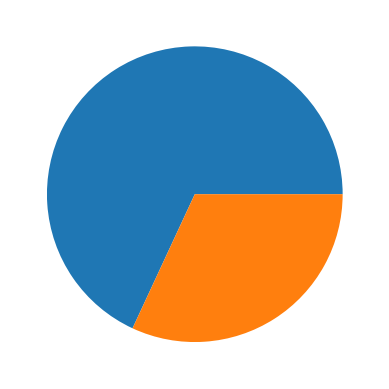

In [ ]:
plt.pie(label_train.value_counts())
plt.show()

Cân bằng dữ liệu bằng phương pháp SMOTE

In [ ]:
df_test['Gender'] = df_test['Gender'].replace('F', 0)
df_test['Gender'] = df_test['Gender'].replace('M', 1)

df_valid['Gender'] = df_valid['Gender'].replace('F', 0)
df_valid['Gender'] = df_valid['Gender'].replace('M', 1)

df_train['Gender'] = df_train['Gender'].replace('F', 0)
df_train['Gender'] = df_train['Gender'].replace('M', 1)

<ipython-input-85-6e8ffa5930d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Gender'] = df_test['Gender'].replace('F', 0)
<ipython-input-85-6e8ffa5930d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Gender'] = df_test['Gender'].replace('M', 1)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5)
df_train, label_train = smote.fit_resample(df_train, label_train)

In [ ]:
df_train['Age'] = df_train['Age'].astype(int)
df_train

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,35,1,24.000000,5.070000,3.110000,1.030000,3.180000,81.200000,3.380000,0.0
1,30,1,23.000000,4.820000,1.180000,1.450000,2.810000,97.100000,4.800000,0.0
2,40,0,20.000000,4.600000,0.500000,1.250000,2.620000,79.000000,3.790000,0.0
3,35,1,26.000000,4.900000,2.530000,1.390000,2.080000,86.000000,6.100000,0.0
4,50,1,21.000000,4.410000,0.870000,1.100000,2.650000,81.300000,6.420000,0.0
...,...,...,...,...,...,...,...,...,...,...
5161,54,0,22.062424,5.478752,1.114970,1.566903,3.177515,59.125091,4.908115,1.0
5162,64,0,26.895221,5.484743,2.031434,1.307426,3.420460,90.580883,3.255349,1.0
5163,67,0,29.273870,5.021407,2.179120,2.079128,3.988850,52.778390,5.341281,1.0
5164,59,1,22.568241,4.127297,0.903622,1.182507,2.342979,73.568241,6.869501,1.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5166 non-null   int64  
 1   Gender     5166 non-null   int64  
 2   BMI        5166 non-null   float64
 3   Chol       5166 non-null   float64
 4   TG         5166 non-null   float64
 5   HDL        5166 non-null   float64
 6   LDL        5166 non-null   float64
 7   Cr         5166 non-null   float64
 8   BUN        5166 non-null   float64
 9   Diagnosis  5166 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 403.7 KB


In [ ]:
label_train.value_counts()

Diagnosis
0.0          2583
1.0          2583
Name: count, dtype: int64

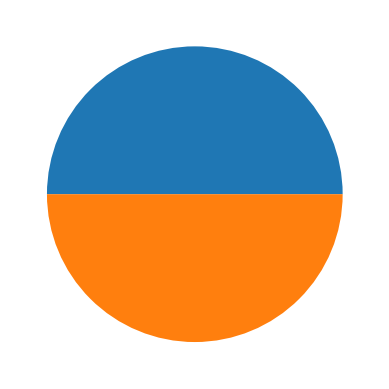

In [ ]:
plt.pie(label_train.value_counts())
plt.show()

In [ ]:
duplicated_rows = df_train[df_train.duplicated()]
print(len(duplicated_rows))

0


# The dataset after pre-processing

In [ ]:
df_train

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,35,1,24.000000,5.070000,3.110000,1.030000,3.180000,81.200000,3.380000,0.0
1,30,1,23.000000,4.820000,1.180000,1.450000,2.810000,97.100000,4.800000,0.0
2,40,0,20.000000,4.600000,0.500000,1.250000,2.620000,79.000000,3.790000,0.0
3,35,1,26.000000,4.900000,2.530000,1.390000,2.080000,86.000000,6.100000,0.0
4,50,1,21.000000,4.410000,0.870000,1.100000,2.650000,81.300000,6.420000,0.0
...,...,...,...,...,...,...,...,...,...,...
5161,39,1,25.000000,5.158584,4.455930,1.040756,2.312917,78.500526,3.062004,1.0
5162,59,1,23.005422,3.946289,0.486072,4.860753,4.860753,83.895121,4.866767,1.0
5163,50,1,25.689137,5.481462,1.383708,1.227565,3.252585,83.000000,4.857228,1.0
5164,56,1,25.000000,6.149469,1.099916,1.010718,3.890666,77.028201,3.900978,1.0


In [ ]:
df_train.describe().round(3)

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5166.000,5166.000,5166.000,5166.000,5166.000,5166.000,5166.000,5166.000,5166.000,5166.0
mean,51.148,0.623,24.031,4.909,1.656,1.871,3.123,71.097,4.908,0.5
std,14.712,0.485,3.363,0.885,1.214,1.284,0.945,18.283,1.224,0.5
min,22.000,0.000,15.000,1.650,0.000,0.000,0.540,4.861,1.380,0.0
25%,38.000,0.000,22.000,4.293,0.940,1.150,2.440,59.700,4.060,0.0
50%,52.000,1.000,24.000,4.860,1.374,1.369,2.930,71.300,4.810,0.5
75%,62.000,1.000,26.000,5.460,2.030,1.712,3.620,82.000,5.600,1.0
max,93.000,1.000,45.000,11.650,32.640,4.861,6.270,307.000,17.730,1.0


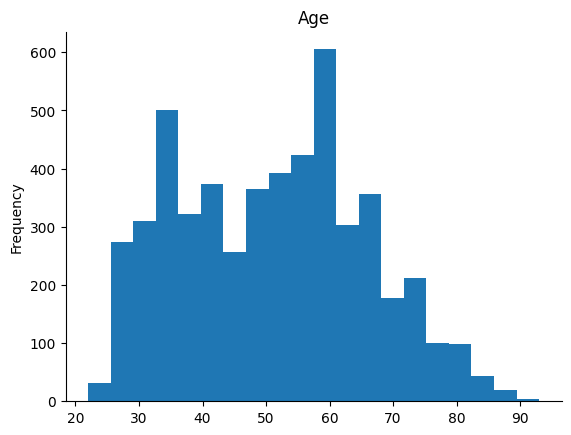

In [ ]:
from matplotlib import pyplot as plt
df_train['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

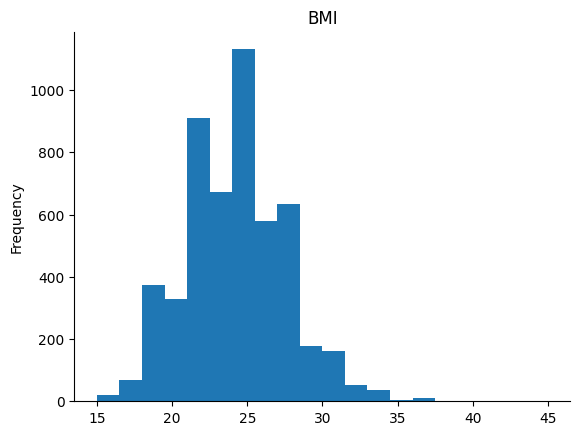

In [ ]:
from matplotlib import pyplot as plt
df_train['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

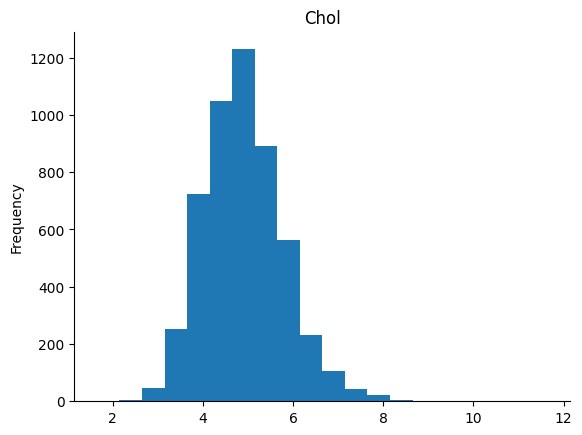

In [ ]:
from matplotlib import pyplot as plt
df_train['Chol'].plot(kind='hist', bins=20, title='Chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

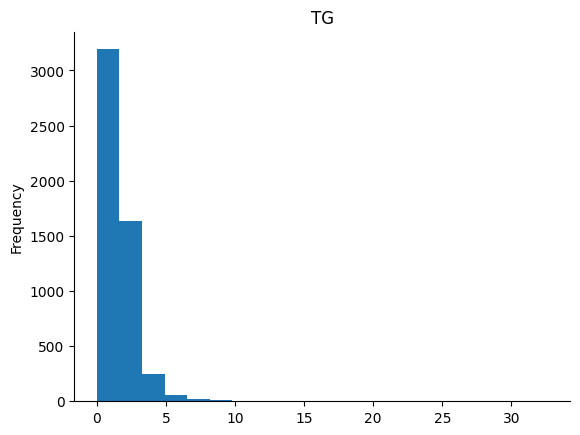

In [ ]:
from matplotlib import pyplot as plt
df_train['TG'].plot(kind='hist', bins=20, title='TG')
plt.gca().spines[['top', 'right',]].set_visible(False)

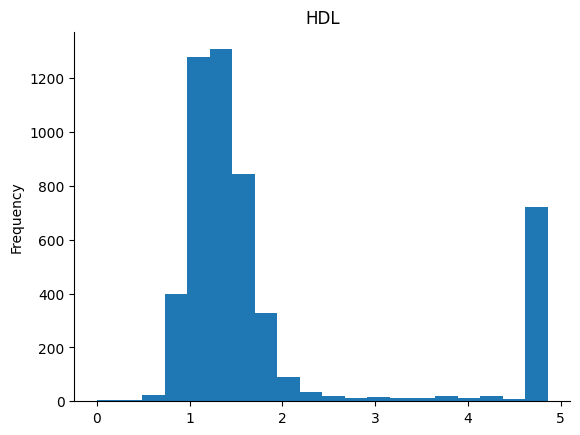

In [ ]:
from matplotlib import pyplot as plt
df_train['HDL'].plot(kind='hist', bins=20, title='HDL')
plt.gca().spines[['top', 'right',]].set_visible(False)

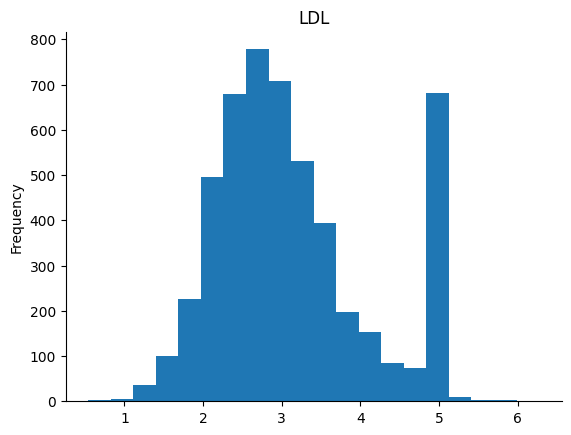

In [ ]:
from matplotlib import pyplot as plt
df_train['LDL'].plot(kind='hist', bins=20, title='LDL')
plt.gca().spines[['top', 'right',]].set_visible(False)

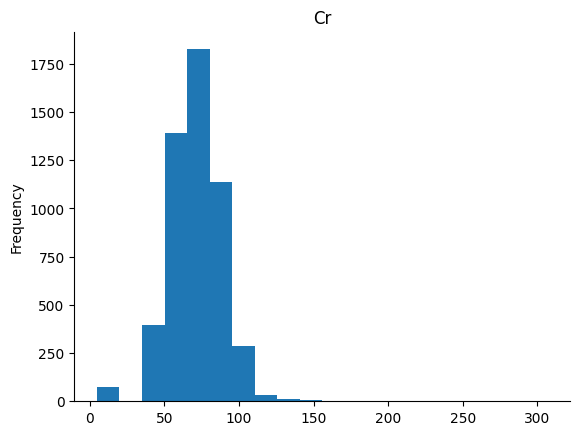

In [ ]:
from matplotlib import pyplot as plt
df_train['Cr'].plot(kind='hist', bins=20, title='Cr')
plt.gca().spines[['top', 'right',]].set_visible(False)

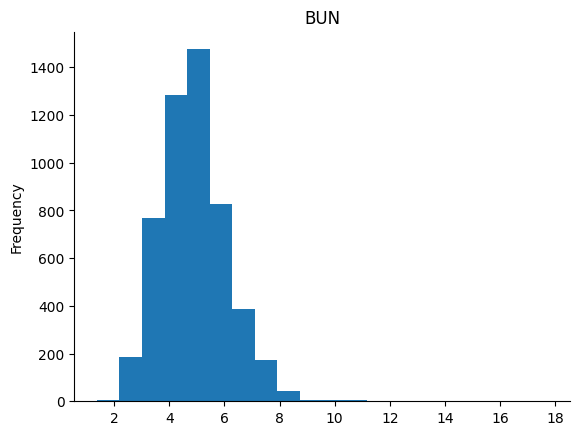

In [ ]:
from matplotlib import pyplot as plt
df_train['BUN'].plot(kind='hist', bins=20, title='BUN')
plt.gca().spines[['top', 'right',]].set_visible(False)

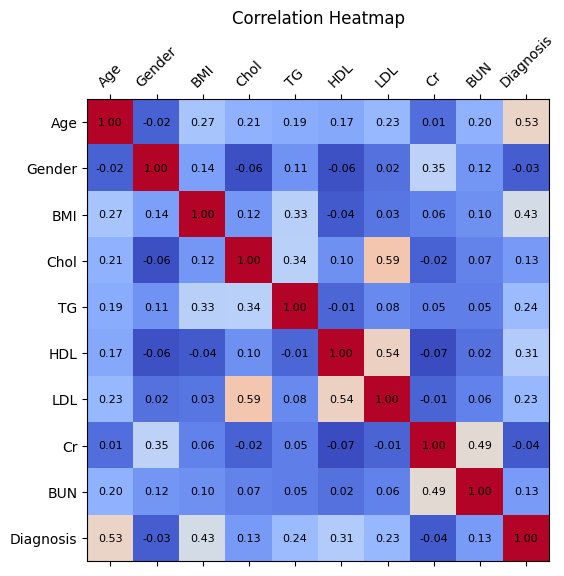

In [ ]:
df['Gender'] = df['Gender'].replace('F', 0)
df['Gender'] = df['Gender'].replace('M', 1)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
ax = plt.axes()
heatmap = ax.matshow(correlation_matrix, cmap="coolwarm")

for (i, j), z in np.ndenumerate(correlation_matrix):
    ax.text(j, i, "{:0.2f}".format(z), ha="center", va="center", fontsize=8)

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Heatmap")
plt.show()

# Clustering

Kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report

In [ ]:
df_kmeans = df_train.copy(deep = True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

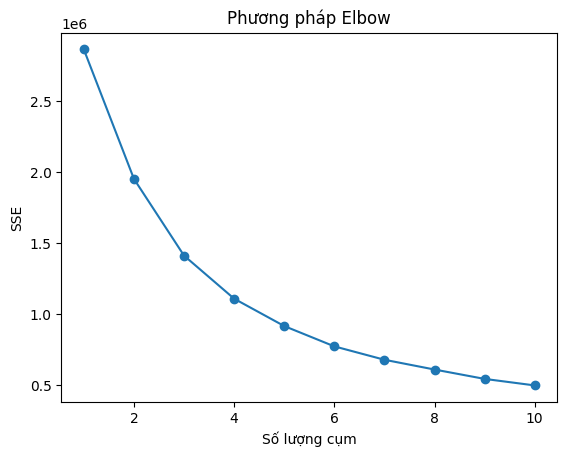

In [ ]:
max_clusters = 10
sse = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_kmeans)
    sse.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), sse, marker='o')
plt.xlabel('Số lượng cụm')
plt.ylabel('SSE')
plt.title('Phương pháp Elbow')
plt.show()

In [ ]:
# Số cụm tối ưu dựa trên biểu đồ Elbow
num_clusters = 5

# Áp dụng thuật toán K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_kmeans)

# Gán nhãn cụm cho dữ liệu
df_kmeans['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_kmeans

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis,Cluster
0,35,1,24.000000,5.070000,3.110000,1.030000,3.180000,81.200000,3.380000,0.0,2
1,30,1,23.000000,4.820000,1.180000,1.450000,2.810000,97.100000,4.800000,0.0,2
2,40,0,20.000000,4.600000,0.500000,1.250000,2.620000,79.000000,3.790000,0.0,2
3,35,1,26.000000,4.900000,2.530000,1.390000,2.080000,86.000000,6.100000,0.0,2
4,50,1,21.000000,4.410000,0.870000,1.100000,2.650000,81.300000,6.420000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
5161,81,0,21.450828,4.697999,1.950740,1.239469,2.423569,81.373369,5.668895,1.0,4
5162,60,0,25.000000,4.846329,2.976136,1.474236,2.420072,69.086643,4.831564,1.0,0
5163,38,0,20.885659,5.177997,1.062009,1.583159,3.073120,62.142829,4.565988,1.0,1
5164,51,0,23.065996,4.574620,0.999598,1.431521,2.563759,65.960402,3.967316,1.0,0


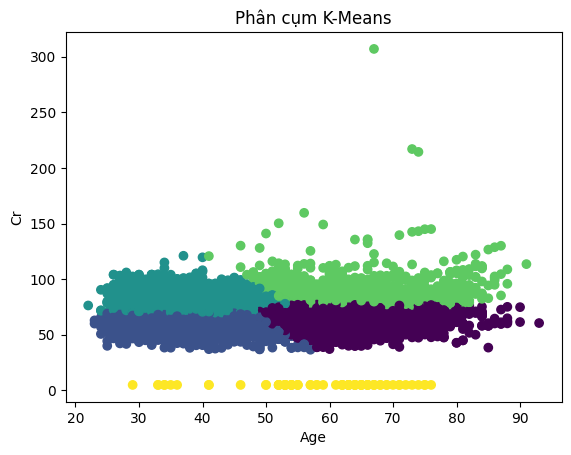

In [ ]:
plt.scatter(df_kmeans['Age'], df_kmeans['Cr'], c = df_kmeans['Cluster'], cmap = 'viridis')
plt.xlabel('Age')
plt.ylabel('Cr')
plt.title('Phân cụm K-Means')
plt.show()

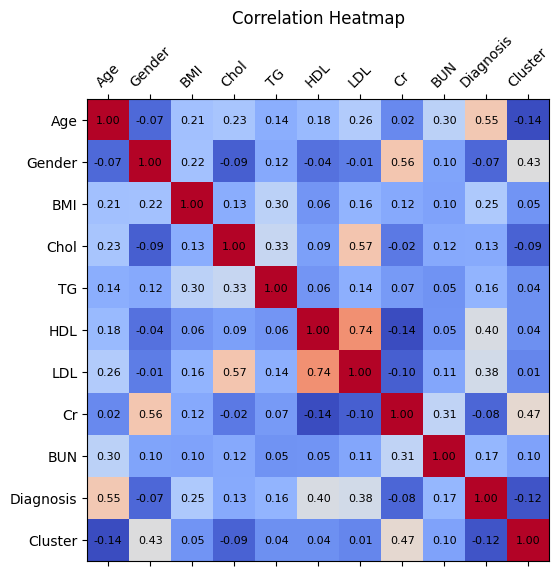

In [ ]:
correlation_matrix = df_kmeans.corr()

plt.figure(figsize=(10, 6))
ax = plt.axes()
heatmap = ax.matshow(correlation_matrix, cmap="coolwarm")

for (i, j), z in np.ndenumerate(correlation_matrix):
    ax.text(j, i, "{:0.2f}".format(z), ha="center", va="center", fontsize=8)

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Heatmap")
plt.show()

Hierarchical

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df_hier = df_train.copy(deep = True)

dis_threshold = 400

hier = AgglomerativeClustering(n_clusters = num_clusters, compute_distances = True)
hier.fit(df_hier)

df_hier['Cluster'] = hier.labels_

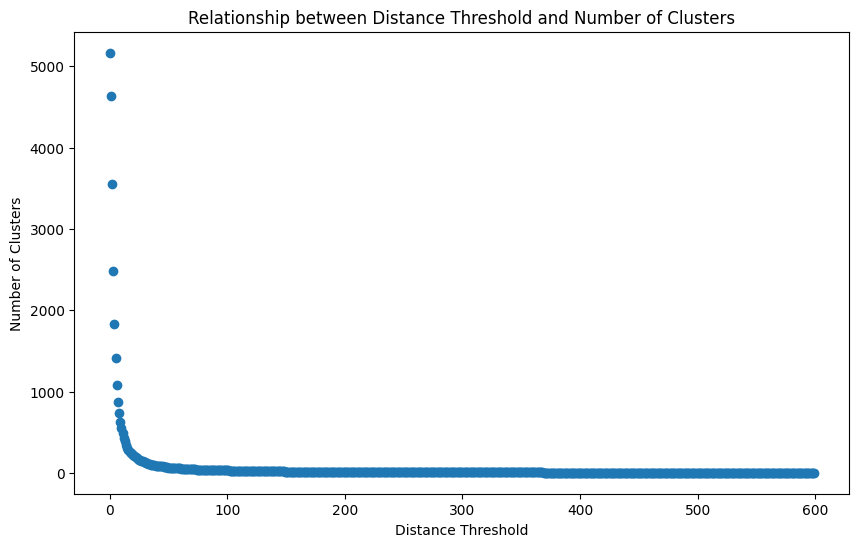

In [ ]:
def generate_data(distance_thresholds):
    num_clusters = []
    for threshold in distance_thresholds:
        # Sample data (replace with your actual data)
        data = df_hier

        # Perform hierarchical clustering for each distance threshold
        clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold)
        clustering.fit(data)

        # Record the number of clusters formed
        num_clusters.append(clustering.n_clusters_)

    return distance_thresholds, num_clusters

# Generate data for different distance thresholds
distance_thresholds = np.arange(0, 600)
x_data, y_data = generate_data(distance_thresholds)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data)

# Set labels and title
plt.xlabel("Distance Threshold")
plt.ylabel("Number of Clusters")
plt.title("Relationship between Distance Threshold and Number of Clusters")

# Show the plot
plt.show()

In [ ]:
df_hier = df_train.copy(deep = True)

In [ ]:
num_clusters = 5

hier = AgglomerativeClustering(n_clusters = num_clusters,
                               compute_distances = True)
hier.fit(df_hier)

df_hier['Cluster'] = hier.labels_

In [ ]:
df_hier

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis,Cluster
0,35,1,24.000000,5.070000,3.110000,1.030000,3.180000,81.200000,3.380000,0.0,2
1,30,1,23.000000,4.820000,1.180000,1.450000,2.810000,97.100000,4.800000,0.0,2
2,40,0,20.000000,4.600000,0.500000,1.250000,2.620000,79.000000,3.790000,0.0,2
3,35,1,26.000000,4.900000,2.530000,1.390000,2.080000,86.000000,6.100000,0.0,2
4,50,1,21.000000,4.410000,0.870000,1.100000,2.650000,81.300000,6.420000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5161,54,0,22.062424,5.478752,1.114970,1.566903,3.177515,59.125091,4.908115,1.0,0
5162,64,0,26.895221,5.484743,2.031434,1.307426,3.420460,90.580883,3.255349,1.0,1
5163,67,0,29.273870,5.021407,2.179120,2.079128,3.988850,52.778390,5.341281,1.0,3
5164,59,1,22.568241,4.127297,0.903622,1.182507,2.342979,73.568241,6.869501,1.0,1


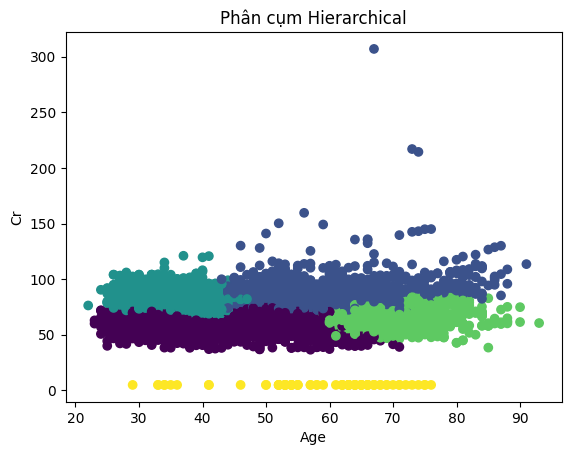

In [ ]:
plt.scatter(df_hier['Age'], df_hier['Cr'], c = df_hier['Cluster'], cmap = 'viridis')
plt.xlabel('Age')
plt.ylabel('Cr')
plt.title('Phân cụm Hierarchical')
plt.show()

# K-Nearest Neighbors

Load data

In [ ]:
df_knn = df_train.copy(deep=True)

In [ ]:
df_knn

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,35,1,24.000000,5.070000,3.110000,1.030000,3.180000,81.200000,3.380000,0.0
1,30,1,23.000000,4.820000,1.180000,1.450000,2.810000,97.100000,4.800000,0.0
2,40,0,20.000000,4.600000,0.500000,1.250000,2.620000,79.000000,3.790000,0.0
3,35,1,26.000000,4.900000,2.530000,1.390000,2.080000,86.000000,6.100000,0.0
4,50,1,21.000000,4.410000,0.870000,1.100000,2.650000,81.300000,6.420000,0.0
...,...,...,...,...,...,...,...,...,...,...
5161,39,1,25.000000,5.158584,4.455930,1.040756,2.312917,78.500526,3.062004,1.0
5162,59,1,23.005422,3.946289,0.486072,4.860753,4.860753,83.895121,4.866767,1.0
5163,50,1,25.689137,5.481462,1.383708,1.227565,3.252585,83.000000,4.857228,1.0
5164,56,1,25.000000,6.149469,1.099916,1.010718,3.890666,77.028201,3.900978,1.0


k = 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming df_knn is your DataFrame
# Separate features (X) and target variable (y)
X = df_knn[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y = df_knn['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the KNN model
k = 1  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Assuming df_test is your test DataFrame
# Separate features (X_test) and target variable (y_test)
X_test = df_test[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y_test = df_test['Diagnosis']

# Standardize the features using the same scaler as used for training
X_test_scaled = scaler.transform(X_test)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = knn_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6378947368421053


k = 3

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming df_knn is your DataFrame
# Separate features (X) and target variable (y)
X = df_knn[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y = df_knn['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the KNN model
k = 3  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Assuming df_test is your test DataFrame
# Separate features (X_test) and target variable (y_test)
X_test = df_test[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y_test = df_test['Diagnosis']

# Standardize the features using the same scaler as used for training
X_test_scaled = scaler.transform(X_test)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = knn_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6884210526315789


k = 5

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming df_knn is your DataFrame
# Separate features (X) and target variable (y)
X = df_knn[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y = df_knn['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the KNN model
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_scaled, y)

KNeighborsClassifier()

In [ ]:
# Assuming df_test is your test DataFrame
# Separate features (X_test) and target variable (y_test)
X_test = df_test[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y_test = df_test['Diagnosis']

# Standardize the features using the same scaler as used for training
X_test_scaled = scaler.transform(X_test)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = knn_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7326315789473684


k = 7

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming df_knn is your DataFrame
# Separate features (X) and target variable (y)
X = df_knn[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y = df_knn['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the KNN model
k = 7  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Assuming df_test is your test DataFrame
# Separate features (X_test) and target variable (y_test)
X_test = df_test[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y_test = df_test['Diagnosis']

# Standardize the features using the same scaler as used for training
X_test_scaled = scaler.transform(X_test)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = knn_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7305263157894737


Chart

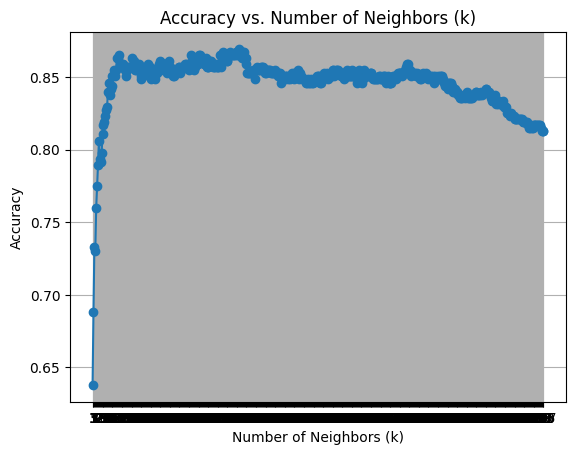

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Initialize empty list to store accuracies
accuracies = []

# Range of k values to test
k_values = range(1, 999, 2)  # Test k from 1 to 999

# Assuming df_knn is your DataFrame
# Separate features (X) and target variable (y)
X = df_knn[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y = df_knn['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assuming df_test is your test DataFrame
# Separate features (X_test) and target variable (y_test)
X_test = df_test[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y_test = df_test['Diagnosis']

# Standardize the features using the same scaler as used for training
X_test_scaled = scaler.transform(X_test)

# Iterate over each value of k
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_scaled, y)
    accuracies.append(knn_model.score(X_test_scaled, y_test))  # Evaluate model accuracy on training set


# Plot accuracy as a function of k
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
index_of_max_accuracy = np.argmax(accuracies)
print("Maximum accuracy:", max(accuracies))
print("Index of maximum accuracy:", index_of_max_accuracy)


Maximum accuracy: 0.8694736842105263
Index of maximum accuracy: 162


k = 215

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming df_knn is your DataFrame
# Separate features (X) and target variable (y)
X = df_knn[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y = df_knn['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the KNN model
k = 215  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=215)

In [ ]:
# Assuming df_test is your test DataFrame
# Separate features (X_test) and target variable (y_test)
X_test = df_test[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
y_test = df_test['Diagnosis']

# Standardize the features using the same scaler as used for training
X_test_scaled = scaler.transform(X_test)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = knn_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8547368421052631


# Decision Tree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


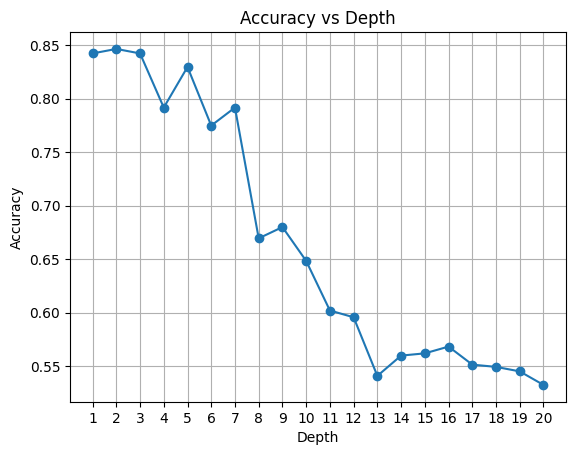

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming df_knn is your DataFrame
# Splitting the data into features (X) and target variable (y)
d = df_knn.drop('Diagnosis', axis=1)
lb = df_knn['Diagnosis']

# Assuming df_test is your test DataFrame
# Separate features (X_test) and target variable (y_test)
d_test = df_test[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
lb_test = df_test['Diagnosis']

tree_accuracies = []

depth_values = range(1, 21)
for depth in depth_values:
  clf = DecisionTreeClassifier(max_depth=depth)
  clf.fit(d, lb)
  y_pred_test = clf.predict(d_test)
  test_accuracy = accuracy_score(lb_test, y_pred_test)
  tree_accuracies.append(test_accuracy)

# Plot accuracy as a function of k
plt.plot(depth_values, tree_accuracies, marker='o')
plt.title('Accuracy vs Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_values)
plt.grid(True)
plt.show()

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming df_knn is your DataFrame
# Splitting the data into features (X) and target variable (y)
d = df_knn.drop('Diagnosis', axis=1)
lb = df_knn['Diagnosis']

# Assuming df_test is your test DataFrame
# Separate features (X_test) and target variable (y_test)
d_test = df_test[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
lb_test = df_test['Diagnosis']

# Initializing the decision tree classifier
clf = DecisionTreeClassifier(max_depth=2)

# Training the decision tree classifier
clf.fit(d, lb)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(max_depth=2)

In [ ]:
# Making predictions
y_pred_test = clf.predict(d_test)

# Evaluating the model
test_accuracy = accuracy_score(lb_test, y_pred_test)

print("Testing accuracy:", test_accuracy)

Testing accuracy: 0.8463157894736842


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Confusion matrix

KNN

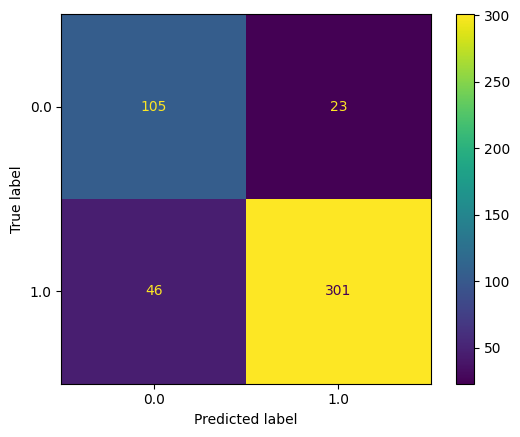

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(label_test, y_pred)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

TN, FP, FN, TP = confusion_matrix(label_test, y_pred).ravel()

# Calculate metrics
recall = TP / (TP + FN)
precision = TP / (TP + FP)
FPR = FP / (FP + TN)
TNR = TN / (TN + FP)
FNR = FN / (FN + TP)

# Create table
table = [["Recall", recall],
         ["Precision", precision],
         ["False Positive Rate (FPR)", FPR],
         ["True Negative Rate (TNR)", TNR],
         ["False Negative Rate (FNR)", FNR]]

# Print table
print(tabulate(table, headers=["Metric", "Value"], tablefmt="grid"))


+---------------------------+----------+
| Metric                    |    Value |
+===========================+==========+
| Recall                    | 0.887608 |
+---------------------------+----------+
| Precision                 | 0.930514 |
+---------------------------+----------+
| False Positive Rate (FPR) | 0.179688 |
+---------------------------+----------+
| True Negative Rate (TNR)  | 0.820312 |
+---------------------------+----------+
| False Negative Rate (FNR) | 0.112392 |
+---------------------------+----------+


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Decision Tree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


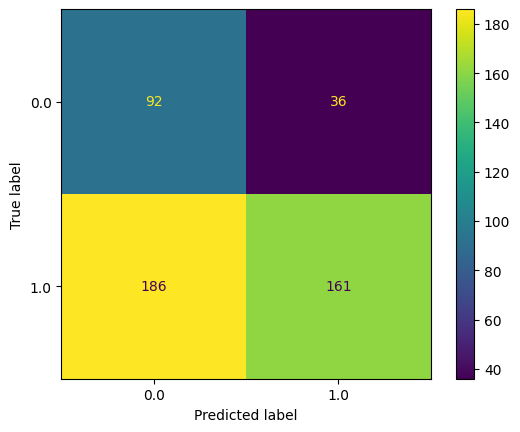

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(label_test, y_pred_test)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

# Calculate confusion matrix
TN, FP, FN, TP = confusion_matrix(label_test, y_pred_test).ravel()

# Calculate metrics
recall = TP / (TP + FN)
precision = TP / (TP + FP)
FPR = FP / (FP + TN)
TNR = TN / (TN + FP)
FNR = FN / (FN + TP)

# Create table
table = [["Recall", recall],
         ["Precision", precision],
         ["False Positive Rate (FPR)", FPR],
         ["True Negative Rate (TNR)", TNR],
         ["False Negative Rate (FNR)", FNR]]

# Print table
print(tabulate(table, headers=["Metric", "Value"], tablefmt="grid"))


+---------------------------+----------+
| Metric                    |    Value |
+===========================+==========+
| Recall                    | 0.463977 |
+---------------------------+----------+
| Precision                 | 0.817259 |
+---------------------------+----------+
| False Positive Rate (FPR) | 0.28125  |
+---------------------------+----------+
| True Negative Rate (TNR)  | 0.71875  |
+---------------------------+----------+
| False Negative Rate (FNR) | 0.536023 |
+---------------------------+----------+


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
